1. [About Dataset](#1)
2. [Libraries](#2)
3. [Read Dataset And Starting Analysis](#3)

<a id="1"></a>

# About Dataset

This dataset is provided as part of the Kaggle competition "House Prices: Advanced Regression Techniques". It contains detailed information on residential properties in Ames, Iowa, and is widely used for regression modeling and feature engineering tasks in machine learning.

### Dataset Overview

- Target Variable: SalePrice – the final sale price of each house in USD
- Number of Observations: 1,460
- Number of Features: 79 explanatory variables
- Task Type: Supervised regression (predicting a continuous value)

### Feature Types

The dataset contains a wide variety of features including:

- Numerical features: e.g., GrLivArea, LotArea, TotalBsmtSF
- Categorical features: e.g., Neighborhood, MSZoning, Street
- Ordinal features: e.g., ExterQual, KitchenQual, BsmtQual
- Binary features: e.g., CentralAir, PavedDrive
- Time-related features: e.g., YearBuilt, YrSold, GarageYrBlt

### Considerations

- The SalePrice variable is right-skewed and may benefit from log transformation.
- Some features contain missing values that require appropriate imputation strategies.
- Several features are correlated, which allows for meaningful feature combinations such as TotalSF (total square footage).

### Project Objective

The objective of this project is to build an accurate machine learning model for predicting house prices. This involves:

- Performing exploratory data analysis
- Handling missing and inconsistent data
- Applying feature engineering and transformation techniques
- Training multiple regression models and evaluating their performance
- Using advanced methods such as regularization and ensembling to improve accuracy





<a id="2"></a>

## Libraries

In [227]:
#%pip install shap
#%pip install xgboost
#%pip install plotly

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

<a id="3"></a>
## Read Dataset And Starting Analysis

In [148]:
house_price_dataset = pd.read_csv("train.csv")
df = house_price_dataset.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [150]:
df.describe().T.iloc[:10]

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


<Axes: >

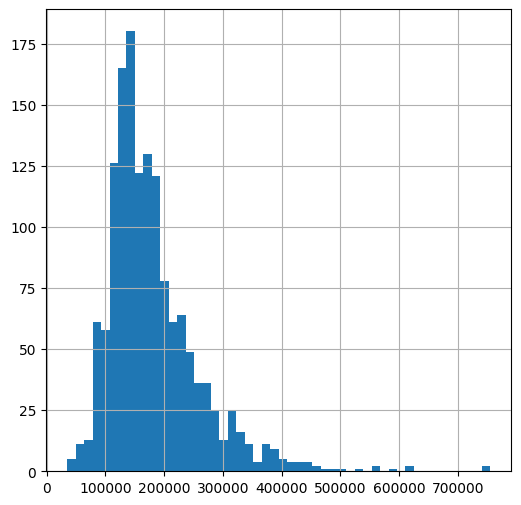

In [151]:
df.SalePrice.hist(figsize=(6, 6), bins=50)

## Generally, Price values are approximately between 100-200k dollars

For now, I will check some features that I think are important

<Axes: >

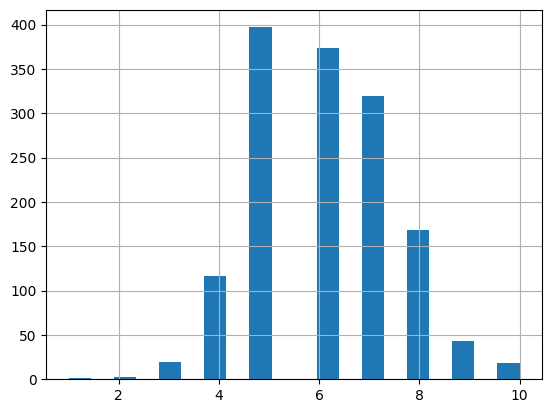

In [152]:
df.OverallQual.hist(bins=20)

<Axes: >

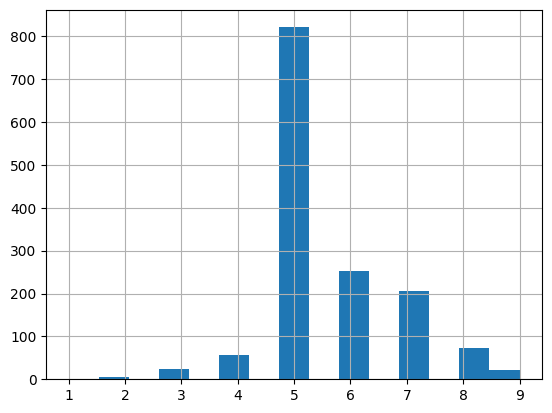

In [153]:
df.OverallCond.hist(bins=15)

<Axes: >

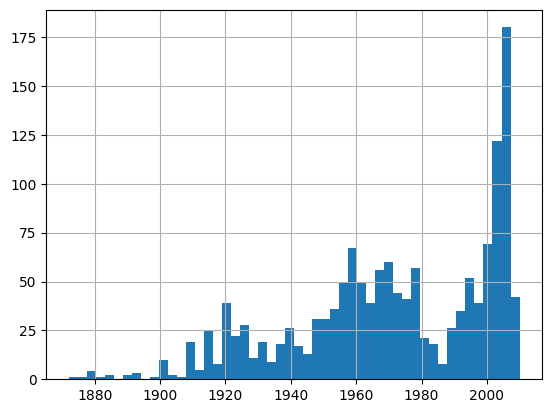

In [154]:
df.YearBuilt.hist(bins=50)

##### There is a cluster here towards the year 2000, meaning most of the evaluated houses are new
##### so although the yearbuilt variable is important, it may be less important than features such as overall quality and condition

##### Also, Most observations in overAllQual are at 5 6 points and again in overAllCond there is a cluster at point 5

In [155]:
# According to my comments It would be better if I create a new variable that named "HouseAge"

df["HouseAge"] = df["YrSold"] - df["YearBuilt"]
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


Text(619100.0, 129.2, 'Corr: -0.52')

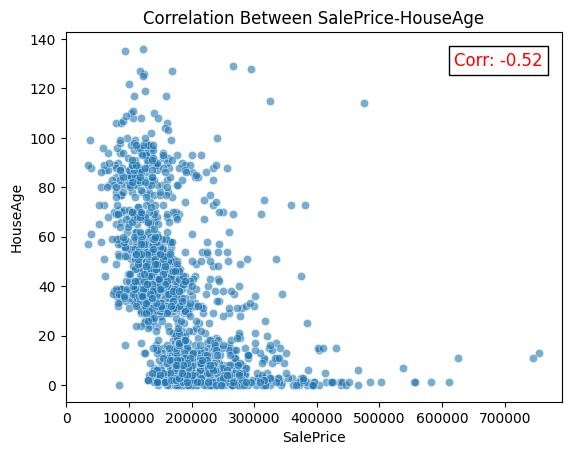

In [156]:
sns.scatterplot(data=df, x="SalePrice", y="HouseAge", alpha= 0.6)
plt.title("Correlation Between SalePrice-HouseAge")

corr = df["SalePrice"].corr(df["HouseAge"])
corr_str = f"Corr: {corr:.2f}"

plt.text(x=df["SalePrice"].max()*0.82, y=df["HouseAge"].max()*0.95, s=corr_str,
         fontsize=12, color='red', bbox=dict(facecolor='white', edgecolor='black'))

In [157]:
remodeled = df[df["YearRemodAdd"] != df["YearBuilt"]]
remodeled["YearRemodAdd"].corr(remodeled["SalePrice"])

# not quite high corr and I can create IsRemodeled bool feature It may be solid than RemodAdd feature.

0.44574769135252373

In [158]:
df["IsRemodeled"] = (df["YearRemodAdd"] != df["YearBuilt"]).astype(int)
df["IsRemodeled"].corr(df["SalePrice"])

# That is worse than RemodAdd so I can ignore it and leave it as default.
# also, clear remaining properties from houseAge 
df.drop(columns=["YrSold", "YearBuilt"], inplace=True)

In [159]:
df.drop(columns=["IsRemodeled"], inplace=True)

## CORRELATION AND THEIR VISUALISATION

In [160]:
corr_SalePrice = df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False).iloc[1:]
corr_SalePrice = pd.DataFrame(corr_SalePrice)
corr_SalePrice["column_name"] = corr_SalePrice.index
corr_SalePrice.reset_index(drop=True)
corr_SalePrice = corr_SalePrice[(corr_SalePrice["SalePrice"] > 0.5) | (corr_SalePrice["SalePrice"] < -.5)]
corr_SalePrice

,SalePrice,column_name
OverallQual,0.790982,OverallQual
GrLivArea,0.708624,GrLivArea
GarageCars,0.640409,GarageCars
GarageArea,0.623431,GarageArea
TotalBsmtSF,0.613581,TotalBsmtSF
1stFlrSF,0.605852,1stFlrSF
FullBath,0.560664,FullBath
TotRmsAbvGrd,0.533723,TotRmsAbvGrd
YearRemodAdd,0.507101,YearRemodAdd
HouseAge,-0.523350,HouseAge


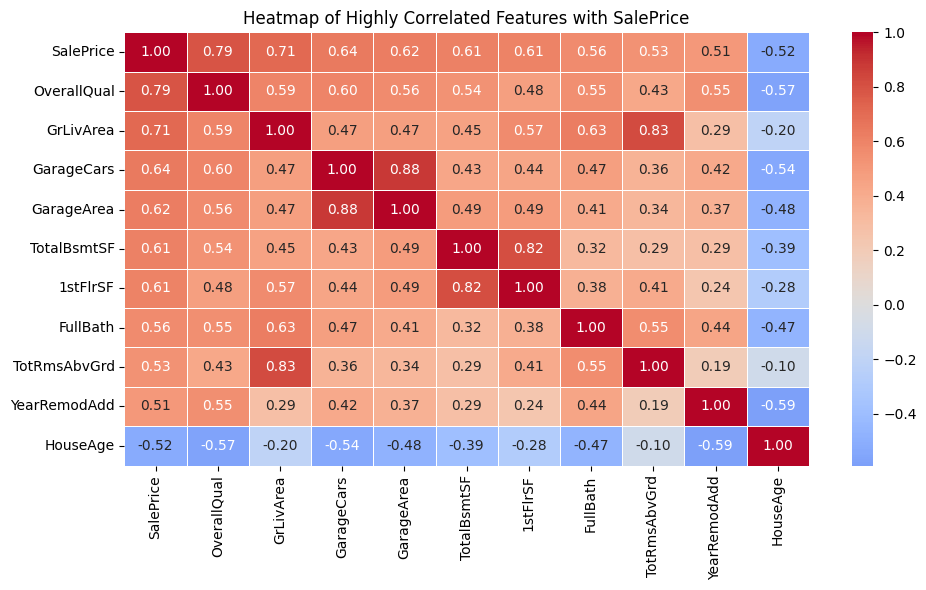

In [161]:
# CORR HEATMAP

selected_columns = ["SalePrice"] + corr_SalePrice["column_name"].tolist()
corr_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Highly Correlated Features with SalePrice")
plt.tight_layout()
plt.show()

### MultiCollenarity (GrLivArea-TotRmsAbvGrd & GarageArea-GarageCars & TotalBsmtSF-1stFlorSF)

I will fix those features with some Analysis

In [162]:
df["TotalSF"] = (df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,HouseAge,TotalSF
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,WD,Normal,208500,5,2566
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,WD,Normal,181500,31,2524
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,WD,Normal,223500,7,2706
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,WD,Abnorml,140000,91,2473
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,WD,Normal,250000,8,3343


In [163]:
df["TotalSF"].corr(df["SalePrice"])

0.7822600527979846

In [164]:
corr_SalePrice = df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False).iloc[1:]
corr_SalePrice = pd.DataFrame(corr_SalePrice)
corr_SalePrice["column_name"] = corr_SalePrice.index
corr_SalePrice.reset_index(drop=True)
corr_SalePrice = corr_SalePrice[(corr_SalePrice["SalePrice"] > 0.5) | (corr_SalePrice["SalePrice"] < -.5)]
corr_SalePrice

,SalePrice,column_name
OverallQual,0.790982,OverallQual
TotalSF,0.782260,TotalSF
GrLivArea,0.708624,GrLivArea
GarageCars,0.640409,GarageCars
GarageArea,0.623431,GarageArea
TotalBsmtSF,0.613581,TotalBsmtSF
1stFlrSF,0.605852,1stFlrSF
FullBath,0.560664,FullBath
TotRmsAbvGrd,0.533723,TotRmsAbvGrd
YearRemodAdd,0.507101,YearRemodAdd


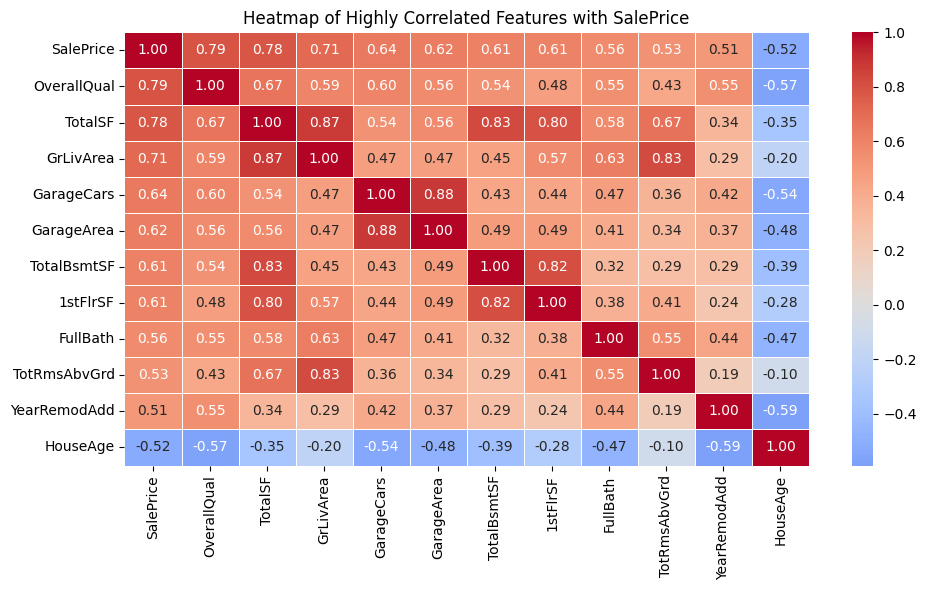

In [165]:
selected_columns = ["SalePrice"] + corr_SalePrice["column_name"].tolist()
corr_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Highly Correlated Features with SalePrice")
plt.tight_layout()
plt.show()

##### TotalSF is now strong correlation with SalePrice and I can delete The components that make up TotalSF from the dataset
Because I want to avoid multicollinearity

In [166]:
df.drop(columns=["TotalBsmtSF", "1stFlrSF", "2ndFlrSF"], inplace=True)

#### Firstly I want to test this analyze with basic RF modeling

In [167]:
X = df.drop(columns=["SalePrice", "GrLivArea"]).select_dtypes("number")
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 33)
(365, 33)
(1095,)
(365,)


In [168]:
rf_test_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred = rf_test_model.predict(X_test)
r2_score(y_true=y_test, y_pred=y_pred)

0.8709824097818022

In [169]:
X = df.drop(columns=["SalePrice"]).select_dtypes("number")
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 34)
(365, 34)
(1095,)
(365,)


In [170]:
rf_test_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred = rf_test_model.predict(X_test)
r2_score(y_true=y_test, y_pred=y_pred)

0.8770417365103358

##### GrLivArea introduces multicollinearity risk, but not lowering model prediction so I don't delete it.

##### Now, let's continue with GarageCars and GarageArea

firstly, I want to examine these two variables and what they represent

GarageCars: Indicates the vehicle capacity of the garage (discrete)

GarageArea: Gives the size of the garage in square meters (continuous)


##### GarageCars is a discrete variable, so it may be better to take it for decision tree algorithms.

In [171]:
df[["GarageCars", "GarageArea", "SalePrice"]].corr()

,GarageCars,GarageArea,SalePrice
GarageCars,1.000000,0.882475,0.640409
GarageArea,0.882475,1.000000,0.623431
SalePrice,0.640409,0.623431,1.000000


In [172]:
df.drop(["GarageArea"], axis=1, inplace=True)

## MISSING VALUES ANALYSIS

In [173]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
missing_counts

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [174]:
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    "MissingCount": missing_counts,
    "MissingPercent": missing_percent
})
missing_df

,MissingCount,MissingPercent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16728\3138524348.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_df["MissingPercent"], y=missing_df.index, palette="viridis")


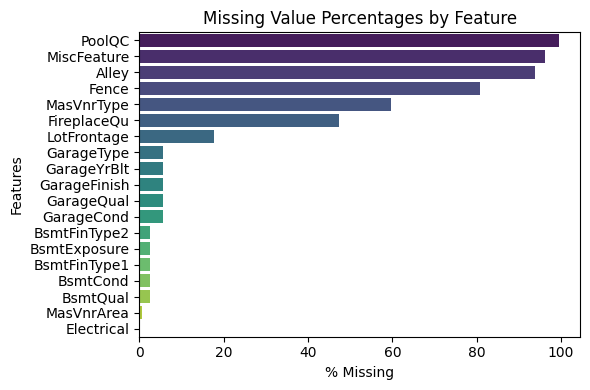

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=missing_df["MissingPercent"], y=missing_df.index, palette="viridis")
plt.title("Missing Value Percentages by Feature")
plt.xlabel("% Missing")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


These variables do not have sequential meaning so, One-Hot Encoding is the most correct approach.

In [176]:
categorical_missing_features = ["PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType"]

for col in categorical_missing_features:
    df[col] = df[col].fillna("None")

df = pd.get_dummies(df, columns=categorical_missing_features, drop_first=True)

In [177]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature_TenC,Alley_None,Alley_Pave,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,False,True,False,False,False,False,True,True,False,False
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,False,True,False,False,False,False,True,False,True,False
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,False,True,False,False,False,False,True,True,False,False
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,False,True,False,False,False,False,True,False,True,False
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,False,True,False,False,False,False,True,True,False,False


##### Let's fill in the remaining missing values.

In [ ]:
# Fireplace
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

# LotFrontage
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)

# Garage
garage_cat_features = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for col in garage_cat_features:
    df[col] = df[col].fillna("None")
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)

# Basement
bsmt_features = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in bsmt_features:
    df[col] = df[col].fillna("None")

# MasVnrArea
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

# Electrical
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])


In [ ]:
df.isnull().sum().sum()

0

### OUTLIER DETECTION

I want to examine the variables which is high corr with SalePrice

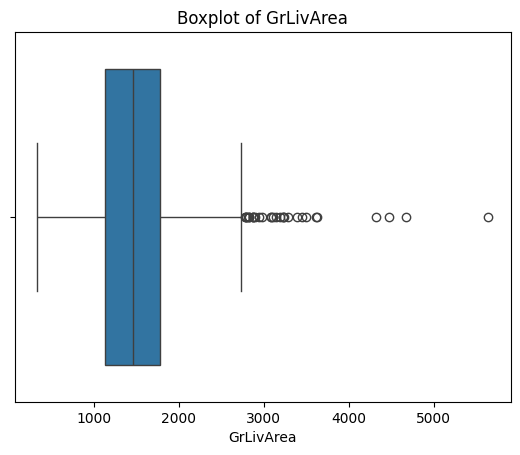

In [180]:
sns.boxplot(x=df["GrLivArea"])
plt.title("Boxplot of GrLivArea")
plt.show()

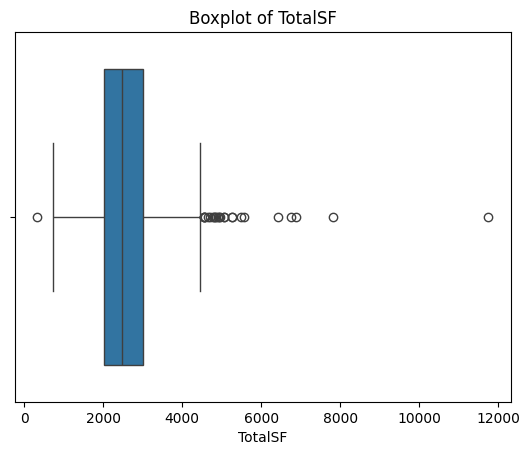

In [181]:
sns.boxplot(x=df["TotalSF"])
plt.title("Boxplot of TotalSF")
plt.show()

In [ ]:
df = df[df["GrLivArea"] < 4000]
df = df[df["TotalSF"] < 6000]

#### BASIC MODEL WITH RANDOM FORESTS ALGORITHM (WITHOUT CATEGORICAL ANALYSIS)

In [183]:
X = df.drop("SalePrice", axis=1).select_dtypes("number")
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model_basic = RandomForestRegressor(random_state=42)
rf_model_basic.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_basic = rf_model_basic.predict(X_test)
r2_score(y_test, y_pred_basic)

0.9024624965288467

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16728\3486516816.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df.head(20), palette="magma")


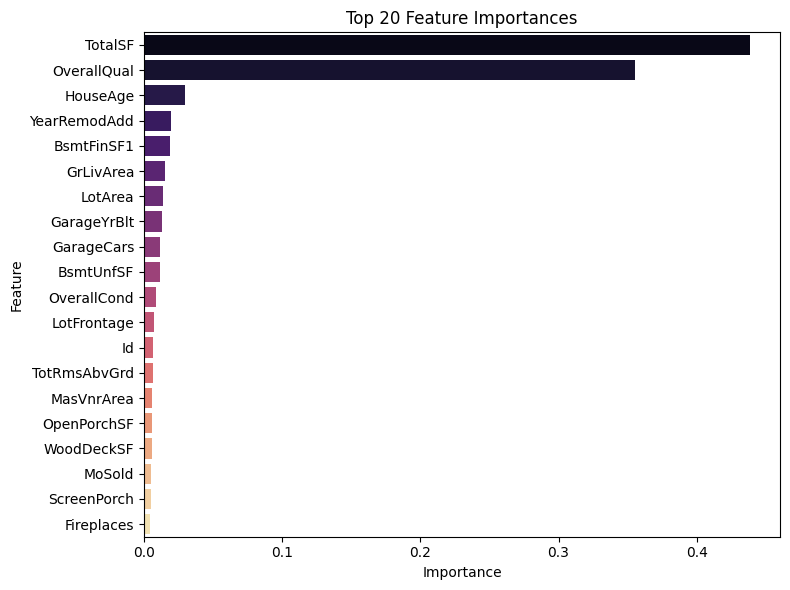

In [ ]:
importances = rf_model_basic.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(20), palette="magma")
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()



### CATEGORICAL ANALYSIS AND ORDINAL ORDER ADJUSTMENT

Categories of quality variables are exactly the same key so, we can adjust the order.

In [ ]:
qual_map = {
    "None": 0,
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

ordinal_features = [
    "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
    "HeatingQC", "KitchenQual", "FireplaceQu",
    "GarageQual", "GarageCond"
]

for col in ordinal_features:
    df[col] = df[col].map(qual_map)


For a few bsmt-like variables there are special keys

In [ ]:
bsmt_exposure_map = {
    "None": 0,
    "No": 1,
    "Mn": 2,
    "Av": 3,
    "Gd": 4
}
df["BsmtExposure"] = df["BsmtExposure"].map(bsmt_exposure_map)


In [ ]:
bsmt_fin_map = {
    "None": 0,
    "Unf": 1,
    "LwQ": 2,
    "Rec": 3,
    "BLQ": 4,
    "ALQ": 5,
    "GLQ": 6
}
df["BsmtFinType1"] = df["BsmtFinType1"].map(bsmt_fin_map)
df["BsmtFinType2"] = df["BsmtFinType2"].map(bsmt_fin_map)


Except those, all variables are nominal so we can make with one-hot encoding for the rest

In [ ]:
nominal_features = [
    col for col in df.select_dtypes(include="object").columns
]
df = pd.get_dummies(df, columns=nominal_features, drop_first=True)


### HYPERPARAMETER TUNING FOR RF

In [195]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
param_grid = {
    'n_estimators': [500],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}
"""
    (parameters that are used)
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
"""

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=10,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
param_dist = {
    'n_estimators': [200],
    'max_depth': [30],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}
"""
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
"""

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [213]:
best_rf = RandomForestRegressor(**random_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=200, random_state=42)

In [214]:
y_pred_best = best_rf.predict(X_test)
print(r2_score(y_test, y_pred_best))
print(root_mean_squared_error(y_test, y_pred_best))
print(mean_absolute_error(y_test, y_pred_best))


0.9044337279505099
25513.910589998188
15942.412955326457


In [206]:
mean_price = y_test.mean()
rmse_pct = (root_mean_squared_error(y_test, y_pred_best) / mean_price) * 100
mae_pct = (mean_absolute_error(y_test, y_pred_best) / mean_price) * 100

print(f"RMSE %: {rmse_pct:.2f}%")
print(f"MAE %: {mae_pct:.2f}%")

RMSE %: 15.84%
MAE %: 9.32%


In [207]:
# Basic Model

rf_model_basic = RandomForestRegressor(random_state=42)
rf_model_basic.fit(X_train, y_train)
y_pred_basic = rf_model_basic.predict(X_test)
print(r2_score(y_test, y_pred_basic))
print(root_mean_squared_error(y_test, y_pred_basic))
print(mean_absolute_error(y_test, y_pred_basic))

0.9072885379379956
25129.938270705577
15890.460687285222


Random Forests basic model has the best score
(The RF model already provides very strong performance in the basic installation thanks to its non-linear structure.)

## STACKING

Base Modeling

In [258]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
lasso = Lasso(alpha=0.001, random_state=42, max_iter=5000)

Meta-Modeling

In [259]:
stack = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('lasso', lasso)
    ],
    final_estimator=LinearRegression(),
    n_jobs=-1,
    passthrough=False
)

In [260]:
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)

print("Stacked R²:", r2_score(y_test, y_pred_stack))
print("Stacked RMSE:", root_mean_squared_error(y_test, y_pred_stack))
print("Stacked MAE:", mean_absolute_error(y_test, y_pred_stack))

Stacked R²: 0.9235466671868061
Stacked RMSE: 22820.382418211404
Stacked MAE: 14154.148271865844


### ANALYSE THE STACK MODEL WITH SHAP

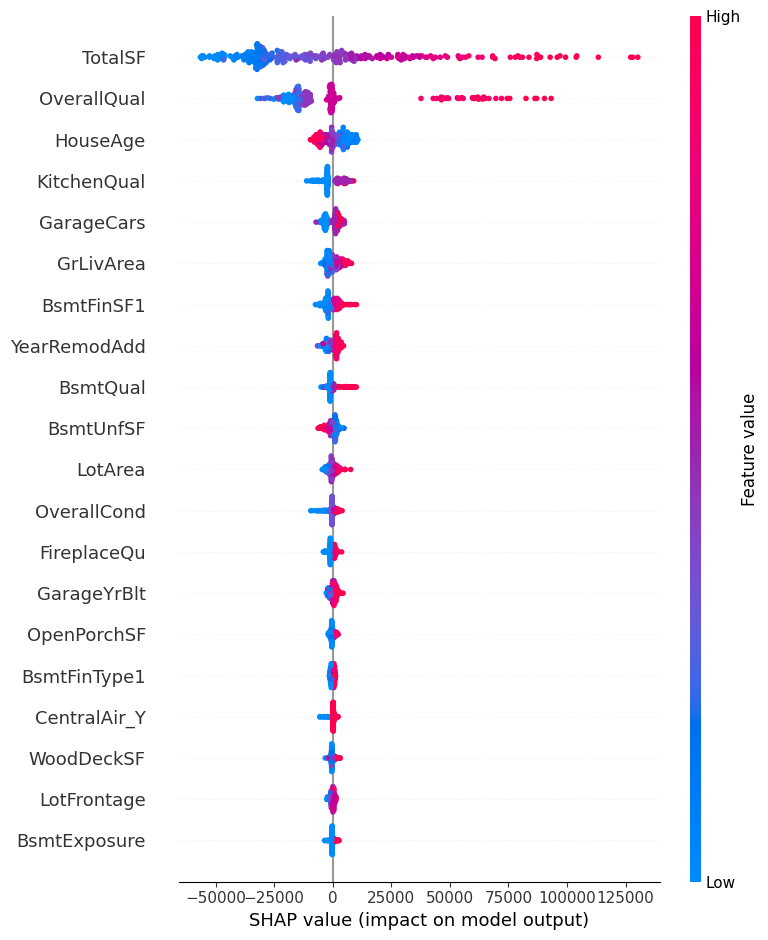

In [229]:
import shap

explainer = shap.TreeExplainer(rf.fit(X_train, y_train))
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

## SHAP Feature Importance Interpretation

- The plot shows the most influential features on the predictions of the Random Forest model.
- **TotalSF** is by far the strongest predictor; as the total area of the house increases, the model predicts higher sale prices.
- **OverallQual** is the second most important feature; better material and workmanship quality significantly increases the predicted price.
- Features like **HouseAge**, **KitchenQual**, **GarageCars**, and **GrLivArea** also play major roles in the model’s predictions.
- The farther a SHAP value is from zero, the greater the impact that feature has on the model’s output.
- On the right, red dots indicate that high values of the feature **positively** impact predictions, while blue dots show that low feature values have a **negative** impact.
